In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../deep_learning/all_results.csv')

In [24]:
df['ds'] = pd.to_datetime(df['ds'])

In [27]:
long_format_df = df.melt(id_vars=['ds', 'vintage_file'], 
                         var_name='Model', 
                         value_name='Estimate')

In [26]:
long_format_df

,ds,vintage_file,Model,Score
0,2018-04-01,vintage_2018_05,AutoNBEATSx,0.005953
1,2018-04-01,vintage_2018_06,AutoNBEATSx,0.006638
2,2018-04-01,vintage_2018_07,AutoNBEATSx,0.005291
3,2018-07-01,vintage_2018_08,AutoNBEATSx,0.006839
4,2018-07-01,vintage_2018_09,AutoNBEATSx,0.006695
...,...,...,...,...
788,2022-10-01,vintage_2023_01,AutoDilatedRNN,0.006896
789,2023-01-01,vintage_2023_02,AutoDilatedRNN,0.002744
790,2023-01-01,vintage_2023_03,AutoDilatedRNN,0.006976
791,2023-01-01,vintage_2023_04,AutoDilatedRNN,0.004544


In [98]:
# combined_tidy_trel.to_csv('../deep_learning/tidy_results.csv', index=False)

In [14]:
df1 = combined_tidy_trel

In [15]:
df1

,ds,vintage_file,model,value,trel
0,2018-04-01,2018-05,AutoNBEATSx,0.005953,0
1,2018-07-01,2018-09,AutoNBEATSx,0.006695,0
2,2018-10-01,2019-01,AutoNBEATSx,0.008507,0
3,2019-04-01,2019-05,AutoNBEATSx,0.003712,0
4,2019-07-01,2019-09,AutoNBEATSx,0.007816,0
...,...,...,...,...,...
788,2021-10-01,2021-12,AutoDilatedRNN,0.011834,3
789,2022-01-01,2022-04,AutoDilatedRNN,0.006329,3
790,2022-07-01,2022-08,AutoDilatedRNN,0.005077,3
791,2022-10-01,2022-12,AutoDilatedRNN,0.007972,3


In [100]:
def load_data(file_path):
    df = (pd.read_csv(file_path)
          .rename(columns={"year_quarter": "ds", "GDPC1": "y"})
          .assign(unique_id=np.ones(len(pd.read_csv(file_path))),
                  ds=lambda df: pd.to_datetime(df['ds'])))
    columns_order = ["unique_id", "ds", "y"] + \
        [col for col in df.columns if col not in ["unique_id", "ds", "y"]]
    df['ds'] = df['ds'] - pd.Timedelta(days=1)
    
    # Shift 'y' column by one quarter
    # df['y'] = df['y'].shift(+3)

    return df[columns_order]

file_path = '../../data/FRED/blocked/vintage_2023_02.csv'


df2 = load_data(file_path)[['ds', 'y']]

merged_df = (df1
             .merge(load_data(file_path)[['ds', 'y']], on='ds', how='left'))


In [101]:
df1

,ds,vintage_file,model,value,trel
0,2018-03-31,2018-05,NBEATS,0.007760,0
1,2018-03-31,2018-06,NBEATS,0.004881,0
2,2018-03-31,2018-07,NBEATS,0.005149,0
3,2018-06-30,2018-08,NBEATS,0.007181,0
4,2018-06-30,2018-09,NBEATS,0.007986,0
...,...,...,...,...,...
3475,2023-03-31,2022-10,NHITS_robust,0.006638,3
3476,2023-06-30,2022-11,NHITS_robust,0.013626,3
3477,2023-06-30,2022-12,NHITS_robust,-0.003883,3
3478,2023-06-30,2023-01,NHITS_robust,0.035692,3


In [102]:
df2

,ds,y
0,1959-03-31,0.022301
1,1959-06-30,0.000705
2,1959-09-30,0.002845
3,1959-12-31,0.022228
4,1960-03-31,-0.005405
...,...,...
251,2021-12-31,-0.004112
252,2022-03-31,-0.001447
253,2022-06-30,0.007980
254,2022-09-30,0.006602


In [103]:
# def calculate_rmse(row):
#     return np.sqrt((row['value'] - row['y']) ** 2)

# # Apply the function to each row
# merged_df['RMSE'] = merged_df.apply(calculate_rmse, axis=1)

# def calculate_mae(row):
#     return np.abs(row['value'] - row['y'])

# merged_df['MAE'] = merged_df.apply(calculate_mae, axis=1)

# def calculate_mape(row):
#     return np.abs((row['y'] - row['value']) / row['y']) * 100

# merged_df['MAPE'] = merged_df.apply(calculate_mape, axis=1)


In [104]:
merged_df

,ds,vintage_file,model,value,trel,y
0,2018-03-31,2018-05,NBEATS,0.007760,0,0.006949
1,2018-03-31,2018-06,NBEATS,0.004881,0,0.006949
2,2018-03-31,2018-07,NBEATS,0.005149,0,0.006949
3,2018-06-30,2018-08,NBEATS,0.007181,0,0.007194
4,2018-06-30,2018-09,NBEATS,0.007986,0,0.007194
...,...,...,...,...,...,...
3475,2023-03-31,2022-10,NHITS_robust,0.006638,3,NaN
3476,2023-06-30,2022-11,NHITS_robust,0.013626,3,NaN
3477,2023-06-30,2022-12,NHITS_robust,-0.003883,3,NaN
3478,2023-06-30,2023-01,NHITS_robust,0.035692,3,NaN


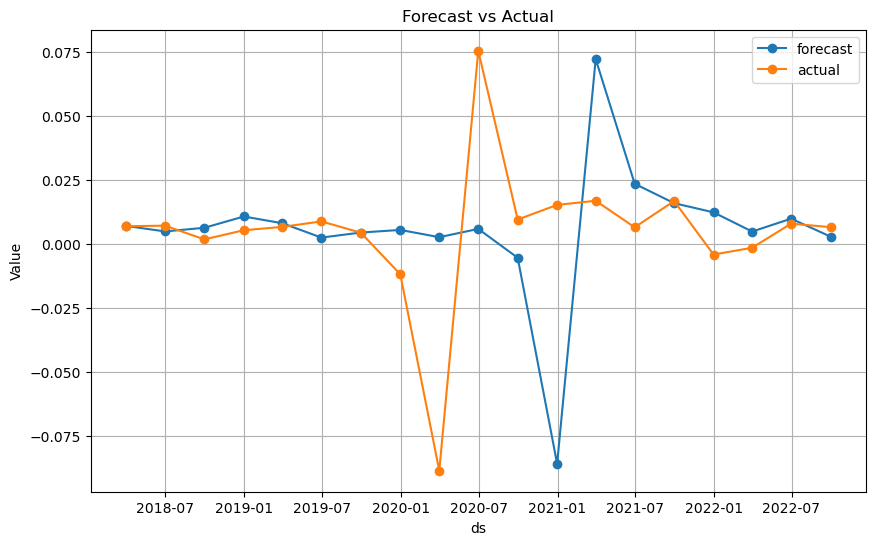

In [105]:
# Filter the dataframe where model is 'NBEATS' and 'trel' is 0
filtered_df = merged_df[(merged_df['model'] == 'RNN') & (merged_df['trel'] == 0)]

every_third = filtered_df.iloc[2::3, :]

# Plot 'ds' against 'value' and 'y'
plt.figure(figsize=(10, 6))

# Plot 'value' with 'ds'
plt.plot(every_third['ds'], every_third['value'], marker='o', label='forecast')

# Plot 'y' with 'ds'
plt.plot(every_third['ds'], every_third['y'], marker='o', label='actual')

plt.xlabel('ds')
plt.ylabel('Value')
plt.title('Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()
